In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.set_style('darkgrid')

In [2]:
def norm_order(df_ind,df_glob):
    # normalize order by  n cells:
    max_cells = {}
    for tp in df_ind.type.unique():
        max_cell = max(df_ind[df_ind.type == tp].cell_id) 
        max_cells[tp] = max_cell

    df_glob['n_cells'] = None

    for key,val in max_cells.items():
        df_glob.n_cells.loc[df_glob['type'] == key] = val
    return df_glob


In [3]:
### CORRELATE omega vs Speed,Pht,Order

# omega file : 
omegas_df = pd.read_csv('ANLSYS2/STROMAL_omegas.txt',sep = '\t',header = None)
omegas_df.columns = ['type','omega']
omegas_df['type'] = omegas_df.type.apply(lambda x: x[1:])
omegas_df = omegas_df.replace('PW','BA-cl')
omegas_df = omegas_df.set_index('type')
print(omegas_df)

          omega
type           
ER     0.830692
BA     0.786042
WS    -1.403128
BA-cl  0.504712
GM    -0.362512


In [4]:
# cell motility data : 

df_glob = pd.read_csv('ANLSYS2/STROMAL/ACT_glob2.csv',index_col = 0)
df_ind = pd.read_csv('ANLSYS2/STROMAL/ACT_ind2.csv',index_col = 0)

df_glob2 = pd.read_csv('ANLSYS2/STROMAL/3PRFDR_glob.csv',index_col = 0)
df_ind2 = pd.read_csv('ANLSYS2/STROMAL/3PRFDR_ind.csv',index_col = 0)


df_ind['model'] = 'act'
df_glob['model'] = 'act'
df_ind2['model'] = 'PRFDR'
df_glob2['model'] = 'PRFDR'

df_glob = norm_order(df_ind,df_glob)
df_glob2 = norm_order(df_ind2,df_glob2)

df_glob2.global_order = df_glob2.global_order/df_glob2.n_cells
df_glob.global_order = df_glob.global_order/df_glob.n_cells
df_glob2.std_glbl_order = df_glob2.std_glbl_order/df_glob2.n_cells
df_glob.std_glbl_order = df_glob.std_glbl_order/df_glob.n_cells

ind_motility  = pd.concat([df_ind, df_ind2])
ind_motility = ind_motility.replace('PW', value = 'BA-cl')
glob_motility  = pd.concat([df_glob, df_glob2])
glob_motility = glob_motility.replace('PW', value = 'BA-cl')

ind_motility = ind_motility.rename(columns = {'pooled_persist':'persist'})
glob_motility = glob_motility.rename(columns = {'pooled_persist':'persist'})

ind_motility = ind_motility[ind_motility.type != 'OFRC']
glob_motility = glob_motility[glob_motility.type != 'OFRC'] 



/home/lau/anaconda2/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
print(ind_motility.columns)

Index(['type', 'iter', 'cell_id', 'speed', 'model'], dtype='object')


SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24) (-0.950664312719925, 0.013056757737381205)
-0.9999999999999999
1.4042654220543672e-24


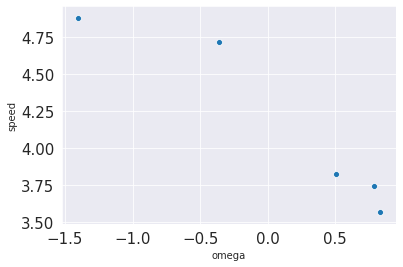

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)


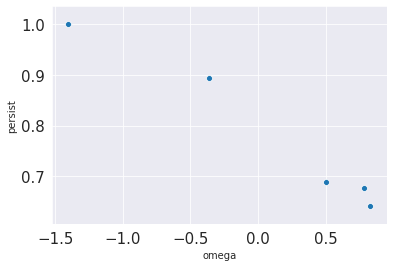

SpearmanrResult(correlation=-0.7999999999999999, pvalue=0.10408803866182788)


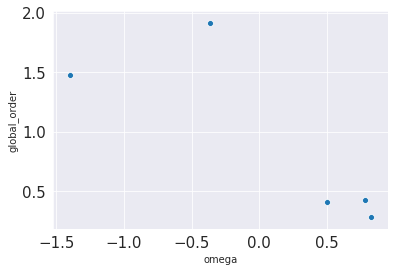

SpearmanrResult(correlation=-0.7999999999999999, pvalue=0.10408803866182788)


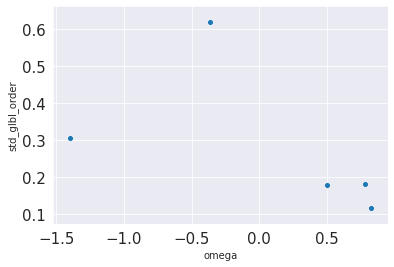

In [6]:
### PRFDR ###

from scipy.stats import spearmanr,pearsonr
### spearman r correlation between speed and omega : 
# avarage speed : 
#av_speed = ind_motility.mean()
prfdr_ind = ind_motility[ind_motility.model == 'PRFDR']
av_speed = prfdr_ind.groupby('type').mean().drop(['iter','cell_id'],axis = 1)
ind_av = av_speed.join(omegas_df)

# spearman : 
stats = spearmanr(ind_av.omega,ind_av.speed)
stats2 = pearsonr(ind_av.omega,ind_av.speed)

print(stats,stats2)
print(stats[0])
print(stats[1])
sns.scatterplot(ind_av.omega,ind_av.speed)
plt.show()

# correlation Pht - omega 
prfdr_glob = glob_motility[glob_motility.model == 'PRFDR']
av_glob = prfdr_glob.groupby('type').mean().drop(['iter','n_cells'],axis = 1)
av_glob = av_glob.join(omegas_df)
corr_pht = spearmanr(av_glob.omega,av_glob.persist)
sns.scatterplot(av_glob.omega,av_glob.persist)
print(corr_pht)
plt.show()

# correlation order-omega
corr_order = spearmanr(av_glob.omega,av_glob.global_order)
sns.scatterplot(av_glob.omega,av_glob.global_order)
print(corr_order)
plt.show()
corr_std_order = spearmanr(av_glob.omega,av_glob.std_glbl_order)
sns.scatterplot(av_glob.omega,av_glob.std_glbl_order)
print(corr_std_order)


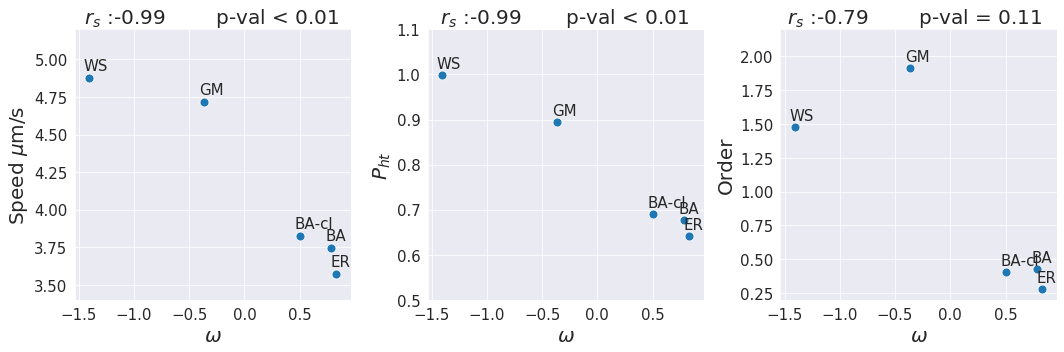

In [7]:
# subplots : 
f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (15,5))
sns.scatterplot(ind_av.omega,ind_av.speed,ax = ax1,s = 80)
sns.scatterplot(av_glob.omega,av_glob.persist,ax = ax2,s = 80)
sns.scatterplot(av_glob.omega,av_glob.global_order,ax = ax3,s = 80)

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('$\omega$',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('$\omega$',fontsize = 20)

ax3.set_ylabel('Order',fontsize = 20)
ax3.set_xlabel('$\omega$',fontsize = 20)

ax1.set_title('$r_s$ :'+ str(stats[0])[:5] + '        p-val < 0.01 ',fontsize = 20)
ax2.set_title('$r_s$ :'+ str(corr_pht[0])[:5] + '       p-val < 0.01 ' ,fontsize = 20)
ax3.set_title('$r_s$ :'+ str(corr_order[0])[:5] + '        p-val = 0.11  ' ,fontsize = 20)

def label_point(x, y, val, ax, x_add,y_add):
    a = pd.concat({'x': x, 'y': y, 'val': val.to_series()}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] - x_add, point['y'] + y_add, str(point['val']),fontsize = 15)

label_point(ind_av.omega, ind_av.speed, ind_av.index, ax1,0.05,0.05) 
label_point(av_glob.omega,av_glob.persist,av_glob.index, ax2,0.05,0.015) 
label_point(av_glob.omega,av_glob.global_order, av_glob.index, ax3,0.05,0.05) 

ax1.set_ylim(3.4,5.2)
ax2.set_ylim(.5,1.1)
ax3.set_ylim(.2,2.2)

plt.tight_layout()

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24) (-0.9652654600042795, 0.007730372374390808)


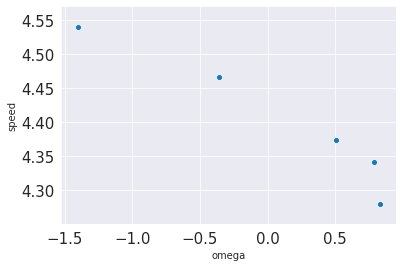

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)


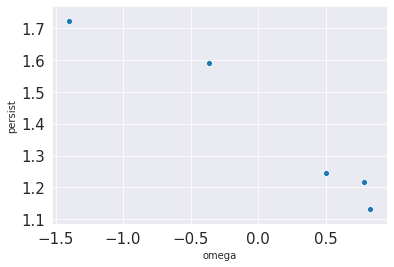

SpearmanrResult(correlation=-0.7999999999999999, pvalue=0.10408803866182788)


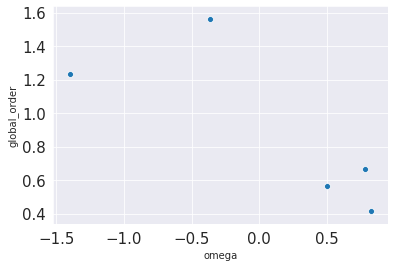

SpearmanrResult(correlation=-0.7999999999999999, pvalue=0.10408803866182788)


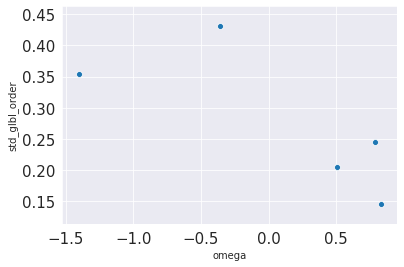

In [8]:
### ACT ###

### spearman r correlation between speed and omega : 
# avarage speed : 
#av_speed = ind_motility.mean()
prfdr_ind = ind_motility[ind_motility.model == 'act']
av_speed = prfdr_ind.groupby('type').mean().drop(['iter','cell_id'],axis = 1)
ind_av = av_speed.join(omegas_df)

# spearman : 
stats = spearmanr(ind_av.omega,ind_av.speed)
stats2 = pearsonr(ind_av.omega,ind_av.speed)

print(stats,stats2)
sns.scatterplot(ind_av.omega,ind_av.speed)
plt.show()

# correlation Pht - omega 
prfdr_glob = glob_motility[glob_motility.model == 'act']
av_glob = prfdr_glob.groupby('type').mean().drop(['iter','n_cells'],axis = 1)
av_glob = av_glob.join(omegas_df)
corr_pht = spearmanr(av_glob.omega,av_glob.persist)
sns.scatterplot(av_glob.omega,av_glob.persist)
print(corr_pht)
plt.show()

# correlation order-omega
corr_order = spearmanr(av_glob.omega,av_glob.global_order)
sns.scatterplot(av_glob.omega,av_glob.global_order)
print(corr_order)
plt.show()
corr_std_order = spearmanr(av_glob.omega,av_glob.std_glbl_order)
sns.scatterplot(av_glob.omega,av_glob.std_glbl_order)
print(corr_std_order)


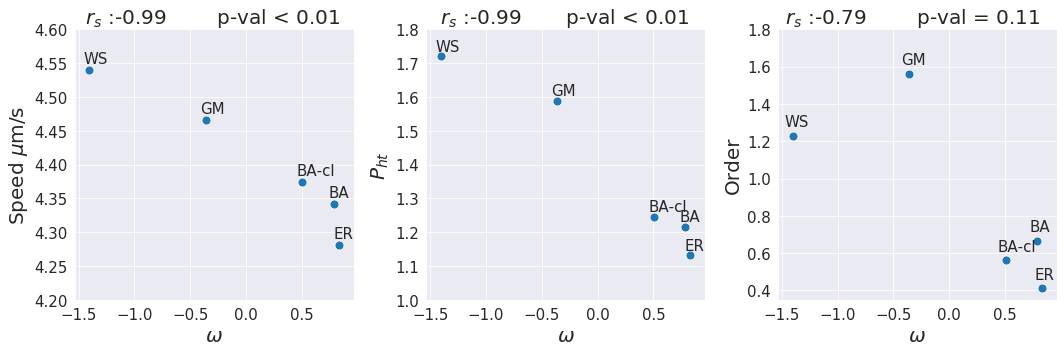

In [13]:
# subplots : 
f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (15,5))
sns.scatterplot(ind_av.omega,ind_av.speed,ax = ax1,s = 80)
sns.scatterplot(av_glob.omega,av_glob.persist,ax = ax2,s = 80)
sns.scatterplot(av_glob.omega,av_glob.global_order,ax = ax3,s = 80)

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('$\omega$',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('$\omega$',fontsize = 20)

ax3.set_ylabel('Order',fontsize = 20)
ax3.set_xlabel('$\omega$',fontsize = 20)

ax1.set_title('$r_s$ :'+ str(stats[0])[:5] + '        p-val < 0.01 ',fontsize = 20)
ax2.set_title('$r_s$ :'+ str(corr_pht[0])[:5] + '       p-val < 0.01 ' ,fontsize = 20)
ax3.set_title('$r_s$ :'+ str(corr_order[0])[:5] + '        p-val = 0.11  ' ,fontsize = 20)
# ax2.set_title('Act',fontsize = 20)
# ax3.set_title()
label_point(ind_av.omega, ind_av.speed, ind_av.index, ax1,0.05,0.01) 
label_point(av_glob.omega,av_glob.persist,av_glob.index, ax2,0.05,0.015) 
label_point(av_glob.omega,av_glob.global_order, av_glob.index, ax3,0.07,0.05) 

ax1.set_ylim(4.2,4.6)
ax2.set_ylim(1,1.8)
ax3.set_ylim(.35,1.8)

plt.tight_layout()